# Parameters search notebook

Libraries, settings & constants

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix as mtrx, roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

RANDOM_STATE = 42
DIR = 'C:/Projects/django-dropout-prediction/Model/'

Datasets

In [2]:
train_data = pd.read_csv(DIR + 'dota2Train.csv')
train_data.columns = ['Target'] + ['Game mode'] + ['Game type'] + [f'Feature_{i}' for i in range(1, train_data.shape[1] - 2)]
test_data = pd.read_csv(DIR + 'dota2Test.csv')
test_data.columns = ['Target'] + ['Game mode'] + ['Game type'] + [f'Feature_{i}' for i in range(1, test_data.shape[1] - 2)]

LogisticRegression

In [14]:
logreg = LogisticRegression(random_state=RANDOM_STATE)
params_grid = {'C': [0.1, 1, 10, 100, 1000],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']}

clf = RandomizedSearchCV(logreg, params_grid, n_iter=10, cv=5, n_jobs=-1, random_state=RANDOM_STATE, scoring='accuracy')
clf.fit(train_data.drop('Target', axis=1), train_data['Target'])

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [18]:
results = pd.DataFrame(clf.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

                                              params  mean_test_score  \
0  {'solver': 'liblinear', 'penalty': 'l1', 'C': ...         0.599424   
1     {'solver': 'saga', 'penalty': 'l1', 'C': 1000}         0.598970   
2      {'solver': 'saga', 'penalty': 'l2', 'C': 100}         0.598970   
3      {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}         0.599381   
4  {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}         0.598938   
5        {'solver': 'saga', 'penalty': 'l1', 'C': 1}         0.598895   
6       {'solver': 'saga', 'penalty': 'l2', 'C': 10}         0.598960   
7      {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}         0.598906   
8  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...         0.598970   
9  {'solver': 'liblinear', 'penalty': 'l1', 'C': ...         0.598970   

   rank_test_score  
0                1  
1                3  
2                3  
3                2  
4                8  
5               10  
6                7  
7                9  
8      

RandomForest

In [5]:
RandomForest = RandomForestClassifier(random_state=RANDOM_STATE)
params_grid = {'n_estimators': [100, 200, 500],
                'max_depth': [10, 20, 50],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]}
clf = RandomizedSearchCV(RandomForest, params_grid, n_iter=10, cv=5, n_jobs=-1, random_state=RANDOM_STATE, scoring='accuracy')
clf.fit(train_data.drop('Target', axis=1), train_data['Target'])

0.5798115223938599

In [ ]:
results = pd.DataFrame(clf.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

Knn

In [7]:
knn = KNeighborsClassifier()
params_grid = {'n_neighbors': [5, 10, 15, 20, 25],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p': [1, 2]}
clf = RandomizedSearchCV(knn, params_grid, n_iter=10, cv=5, n_jobs=-1, random_state=RANDOM_STATE, scoring='accuracy')
clf.fit(train_data.drop('Target', axis=1), train_data['Target'])

0.5335665015058778


In [ ]:
results = pd.DataFrame(clf.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

DecisionTree

In [9]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
params_grid = {'max_depth': [10, 20, 30, 40, 50],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
clf = RandomizedSearchCV(dt, params_grid, n_iter=10, cv=5, n_jobs=-1, random_state=RANDOM_STATE, scoring='accuracy')
clf.fit(train_data.drop('Target', axis=1), train_data['Target'])

0.5211308656368405


In [ ]:
results = pd.DataFrame(clf.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

Gradient Boost


In [12]:
lgbm = LGBMClassifier(random_state=RANDOM_STATE)
params_grid = {'n_estimators': [100, 200, 500],
                'max_depth': [10, 20, 50],
                'learning_rate': [0.01, 0.1, 1]}
clf = RandomizedSearchCV(lgbm, params_grid, n_iter=10, cv=5, n_jobs=-1, random_state=RANDOM_STATE, scoring='accuracy')
clf.fit(train_data.drop('Target', axis=1), train_data['Target'])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 48782, number of negative: 43867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 92649, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526525 -> initscore=0.106199
[LightGBM] [Info] Start training from score 0.106199


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [10, 20, 50],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [13]:
results = pd.DataFrame(clf.cv_results_)
print(results[['params', 'mean_test_score', 'rank_test_score']])

                                              params  mean_test_score  \
0  {'n_estimators': 500, 'max_depth': 50, 'learni...         0.591836   
1  {'n_estimators': 200, 'max_depth': 20, 'learni...         0.592958   
2  {'n_estimators': 100, 'max_depth': 10, 'learni...         0.593120   
3  {'n_estimators': 100, 'max_depth': 20, 'learni...         0.560664   
4  {'n_estimators': 100, 'max_depth': 10, 'learni...         0.562122   
5  {'n_estimators': 500, 'max_depth': 10, 'learni...         0.590519   
6  {'n_estimators': 200, 'max_depth': 50, 'learni...         0.593153   
7  {'n_estimators': 500, 'max_depth': 50, 'learni...         0.590735   
8  {'n_estimators': 100, 'max_depth': 20, 'learni...         0.594523   
9  {'n_estimators': 100, 'max_depth': 50, 'learni...         0.561711   

   rank_test_score  
0                5  
1                4  
2                3  
3               10  
4                8  
5                7  
6                2  
7                6  
8      

Looks like LogisticRegression is the best model for us, so we'll use it

In [46]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=RANDOM_STATE)
model.fit(train_data.drop('Target', axis=1), train_data['Target'])
predictions = model.predict(test_data.drop('Target', axis=1))
print(accuracy_score(test_data['Target'], predictions))

0.5962304478771981


In [26]:
coefs = pd.DataFrame(model.coef_, columns=train_data.drop('Target', axis=1).columns)
display(coefs.sort_values(by=0, axis=1, ascending=False).head(5))

,Feature_57,Feature_103,Feature_36,Feature_42,Feature_67,Feature_96,Feature_5,Feature_102,Feature_75,Feature_32,Feature_9,Feature_18,Feature_48,Feature_22,Feature_37,Feature_70,Feature_6,Feature_31,Feature_27,Feature_84,Feature_2,Feature_29,Feature_83,Feature_20,Feature_33,Feature_71,Feature_40,Feature_94,Feature_64,Feature_87,Feature_28,Feature_14,Feature_110,Feature_44,Feature_50,Feature_90,Feature_68,Feature_88,Feature_4,Feature_8,Feature_41,Feature_85,Feature_60,Feature_7,Feature_30,Feature_35,Feature_95,Feature_16,Feature_54,Feature_93,Feature_10,Feature_51,Feature_81,Game mode,Feature_49,Feature_24,Feature_55,Feature_23,Feature_63,Feature_108,Feature_109,Game type,Feature_98,Feature_104,Feature_73,Feature_78,Feature_99,Feature_38,Feature_62,Feature_47,Feature_76,Feature_26,Feature_105,Feature_79,Feature_45,Feature_17,Feature_1,Feature_101,Feature_15,Feature_82,Feature_59,Feature_43,Feature_86,Feature_11,Feature_12,Feature_56,Feature_77,Feature_92,Feature_97,Feature_34,Feature_112,Feature_89,Feature_65,Feature_69,Feature_3,Feature_74,Feature_19,Feature_72,Feature_111,Feature_13,Feature_52,Feature_46,Feature_25,Feature_113,Feature_107,Feature_21,Feature_66,Feature_100,Feature_53,Feature_39,Feature_106,Feature_58,Feature_80,Feature_61,Feature_91
0,0.489203,0.4071,0.287941,0.257909,0.256119,0.235507,0.233955,0.231115,0.228808,0.225982,0.214834,0.21123,0.208426,0.204285,0.203868,0.185768,0.174076,0.171568,0.16313,0.158986,0.150551,0.131208,0.128691,0.121908,0.11876,0.117594,0.117078,0.112075,0.095327,0.094826,0.093821,0.092632,0.086136,0.085607,0.07761,0.070177,0.068513,0.060375,0.060374,0.05594,0.051333,0.050672,0.050224,0.046241,0.044575,0.037218,0.035573,0.026037,0.018391,0.017988,0.017315,0.013156,0.009782,0.000646,0.000529,0.0,0.0,0.0,0.0,0.0,-0.002799,-0.004423,-0.007162,-0.009528,-0.011046,-0.015175,-0.021738,-0.0223,-0.023191,-0.024738,-0.033834,-0.034976,-0.056488,-0.068231,-0.070625,-0.082441,-0.088712,-0.096067,-0.111826,-0.114475,-0.11581,-0.120052,-0.12812,-0.138915,-0.140969,-0.141359,-0.143621,-0.148499,-0.149636,-0.151944,-0.156067,-0.159973,-0.165889,-0.168113,-0.175697,-0.178007,-0.178245,-0.193906,-0.204921,-0.215834,-0.224193,-0.2291,-0.234581,-0.242577,-0.246618,-0.24871,-0.256023,-0.280194,-0.323731,-0.334629,-0.336117,-0.40406,-0.430267,-0.478337,-0.539914


Text(50.722222222222214, 0.5, 'True')

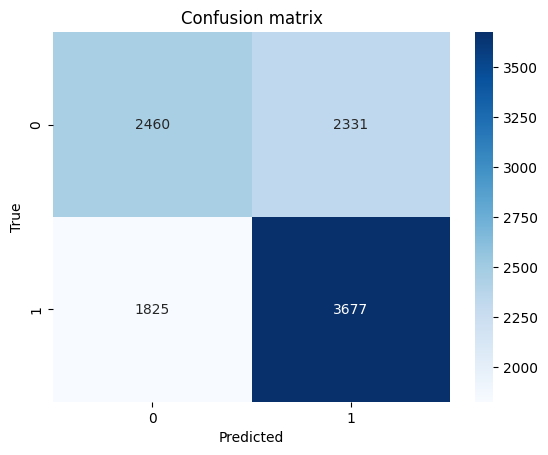

In [57]:
confusion_matrix = mtrx(test_data['Target'].values, predictions)
plot = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

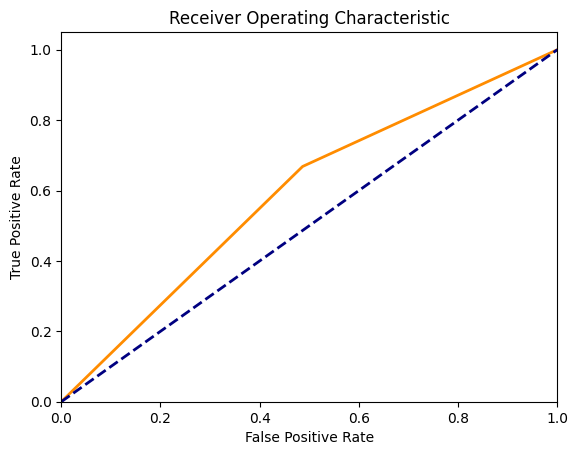

In [58]:
roc_auc = roc_auc_score(test_data['Target'], predictions)
fpr, tpr, _ = roc_curve(test_data['Target'], predictions)
roc_auc = auc(fpr, tpr)
plot = plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

Model works not good but anyway